In [254]:
%matplotlib inline

In [303]:
import pandas as pd
from Bio import SeqIO
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import math
from itertools import product

In [171]:
def return_contig_id(x):
    import re
    pattern = re.compile('_(pcontig_[0-9]*)')
    return pattern.search(x).groups()[0]

In [2]:
base_folder = '/home/benjamin/genome_assembly/PST79/FALCON/p_assemblies/v9_1/Pst_E104_v1/nucmer_split/assemblytics'

In [172]:
os.chdir(base_folder)

In [14]:
_8kbp_folders = [x for x in os.listdir(base_folder) if x.endswith('_8kbp')]
pcontig_fa = [x for x in os.listdir(base_folder) if x.endswith('.fa') and '__pcontig' in x and 'h_ctgs' not in x]

In [173]:
len(_8kbp_folders) - len(pcontig_fa) #makes sense as this is the number of pwoh contigs plus whole assembly 

-73

In [185]:
_8kbp_folders.sort()
Assemblytics_summary_df_list = []
variation_types = ['Insertion', 'Deletion', 'Tandem_expansion', 'Tandem_contraction', 'Repeat_expansion', 'Repeat_contraction']
for folder in _8kbp_folders[:-1]:
    #get the summary file
    summary_file = [x for x in os.listdir(os.path.abspath(folder)) \
                    if x.endswith('Assemblytics_structural_variants.summary.csv')][0]
    file_name = ''
    file_name = os.path.join(base_folder, folder, summary_file)
    #now convert summary file to a df usable file
    with open(file_name) as s_handle:
        out_handle = open(file_name+'df', 'w')
        variation_type = ''
        for line in s_handle:
            if line.strip() == '':
                continue
            if 'Total' in line:
                continue
            line = line.strip('\n')
            if line in variation_types:
                variation_type = line
                next
            else:
                line = variation_type + ','+line
                print(line, file=out_handle)
        out_handle.close()  
    #now read in the dataframe and reformat the indexes so it is useful later on
    #Multiindex column contig_id, numbers; Multiindex rows Type and size range
    contig = ''
    contig = return_contig_id(folder)
    print('Reading in %s' % (contig))
    var_df = ''
    var_df = pd.read_csv(file_name+'df', header=None, names=['Type', 'Size range', 'Count', 'Total bp'])
    if len(var_df) == 0: #some contigs might not have any variations called.
        continue
    index = pd.MultiIndex.from_tuples(list(zip(var_df['Type'],var_df['Size range'])), names=['Type', 'Size range'])
    var_df = var_df.set_index(index)
    var_df = var_df.iloc[:,2:] #subset the two remaining useful columns
    old_columns = list(var_df.columns)
    col_index = pd.MultiIndex.from_tuples(list(zip([contig, contig], old_columns)),names = ['contig_id','numbers'])
    var_df.columns = col_index
    Assemblytics_summary_df_list.append(var_df)
Assemblytics_summary_df = pd.concat(Assemblytics_summary_df_list, axis=1)

Reading in pcontig_000
Reading in pcontig_001
Reading in pcontig_002
Reading in pcontig_003
Reading in pcontig_004
Reading in pcontig_005
Reading in pcontig_006
Reading in pcontig_007
Reading in pcontig_008
Reading in pcontig_009
Reading in pcontig_010
Reading in pcontig_011
Reading in pcontig_012
Reading in pcontig_013
Reading in pcontig_014
Reading in pcontig_016
Reading in pcontig_017
Reading in pcontig_018
Reading in pcontig_019
Reading in pcontig_020
Reading in pcontig_021
Reading in pcontig_022
Reading in pcontig_023
Reading in pcontig_025
Reading in pcontig_026
Reading in pcontig_027
Reading in pcontig_028
Reading in pcontig_029
Reading in pcontig_030
Reading in pcontig_031
Reading in pcontig_032
Reading in pcontig_033
Reading in pcontig_034
Reading in pcontig_035
Reading in pcontig_036
Reading in pcontig_037
Reading in pcontig_039
Reading in pcontig_040
Reading in pcontig_041
Reading in pcontig_042
Reading in pcontig_043
Reading in pcontig_044
Reading in pcontig_045
Reading in 

In [205]:
Assemblytics_summary_df.columns

MultiIndex(levels=[['pcontig_000', 'pcontig_001', 'pcontig_002', 'pcontig_003', 'pcontig_004', 'pcontig_005', 'pcontig_006', 'pcontig_007', 'pcontig_008', 'pcontig_009', 'pcontig_010', 'pcontig_011', 'pcontig_012', 'pcontig_013', 'pcontig_014', 'pcontig_016', 'pcontig_017', 'pcontig_018', 'pcontig_019', 'pcontig_020', 'pcontig_021', 'pcontig_022', 'pcontig_023', 'pcontig_025', 'pcontig_026', 'pcontig_027', 'pcontig_028', 'pcontig_029', 'pcontig_030', 'pcontig_031', 'pcontig_032', 'pcontig_033', 'pcontig_034', 'pcontig_035', 'pcontig_036', 'pcontig_037', 'pcontig_039', 'pcontig_040', 'pcontig_041', 'pcontig_042', 'pcontig_043', 'pcontig_044', 'pcontig_045', 'pcontig_046', 'pcontig_047', 'pcontig_048', 'pcontig_049', 'pcontig_050', 'pcontig_052', 'pcontig_054', 'pcontig_055', 'pcontig_056', 'pcontig_057', 'pcontig_058', 'pcontig_059', 'pcontig_060', 'pcontig_062', 'pcontig_064', 'pcontig_065', 'pcontig_066', 'pcontig_067', 'pcontig_068', 'pcontig_069', 'pcontig_070', 'pcontig_072', 'pcon

In [233]:
!pwd

/home/benjamin/genome_assembly/PST79/FALCON/p_assemblies/v9_1/Pst_E104_v1/nucmer_split/assemblytics


In [234]:
Assemblytics_summary_df.to_csv("Assemblytics_summary_df")

In [235]:
Assemblytics_summary_df.unstack()

contig_id          pcontig_000                                                 \
numbers                  Count                                                  
Size range             1-10 bp 10-50 bp 10000-50000 bp 50-500 bp 500-10000 bp   
Type                                                                            
Deletion                  2096      111              2         7            8   
Insertion                 1745       96              4         9           17   
Repeat_contraction           0        4              7        10           18   
Repeat_expansion             1        2              3         8           12   
Tandem_contraction           0        0              0         0            5   
Tandem_expansion             0        0              0         5            4   

contig_id                                                                   \
numbers            Total bp                                                  
Size range          1-10 bp 10-50 bp 10000-50000 bp 50-500 bp 500-10000 bp   
Type                                                                         
Deletion               3928     1893          29285      1648        13689   
Insertion              3696     1664          45217      1592        53726   
Repeat_contraction        0       88         109427      2222        49264   
Repeat_expansion          8       89          70570      1329        57083   
Tandem_contraction        0        0              0         0        25135   
Tandem_expansion          0        0              0      1393        22469   

contig_id              ...      pcontig_241                                    \
numbers                ...            Count                                     
Size range             ...          1-10 bp 10-50 bp 10000-50000 bp 50-500 bp   
Type                   ...                                                      
Deletion               ...               14        0              0         0   
Insertion              ...                5        0              0         0   
Repeat_contraction     ...                0        0              0         0   
Repeat_expansion       ...                0        0              0         0   
Tandem_contraction     ...                0        0              0         0   
Tandem_expansion       ...                0        0              0         0   

contig_id                                                                   \
numbers                         Total bp                                     
Size range         500-10000 bp  1-10 bp 10-50 bp 10000-50000 bp 50-500 bp   
Type                                                                         
Deletion                      0       19        0              0         0   
Insertion                     0        5        0              0         0   
Repeat_contraction            0        0        0              0         0   
Repeat_expansion              0        0        0              0         0   
Tandem_contraction            0        0        0              0         0   
Tandem_expansion              0        0        0              0         0   

contig_id                        
numbers                          
Size range         500-10000 bp  
Type                             
Deletion                      0  
Insertion                     0  
Repeat_contraction            0  
Repeat_expansion              0  
Tandem_contraction            0  
Tandem_expansion              0  

[6 rows x 1000 columns]

In [357]:
#here get the summary of all Types of variations by size intervals given by Assembletics
Size_summary = Assemblytics_summary_df.sum(level='numbers', axis=1)['Total bp']/1000
index_a = [x.replace(' bp', '') for x in Size_summary["Insertion"].index]
var_types = Size_summary.index.levels[0]



In [350]:
[x.replace(' bp','') for x in index_a]

['1-10', '10-50', '50-500', '500-10000', '10000-50000']

In [325]:
def random_color():
    import random
    r = lambda: random.randint(0,255)
    return ('#%02X%02X%02X' % (r(),r(),r()))

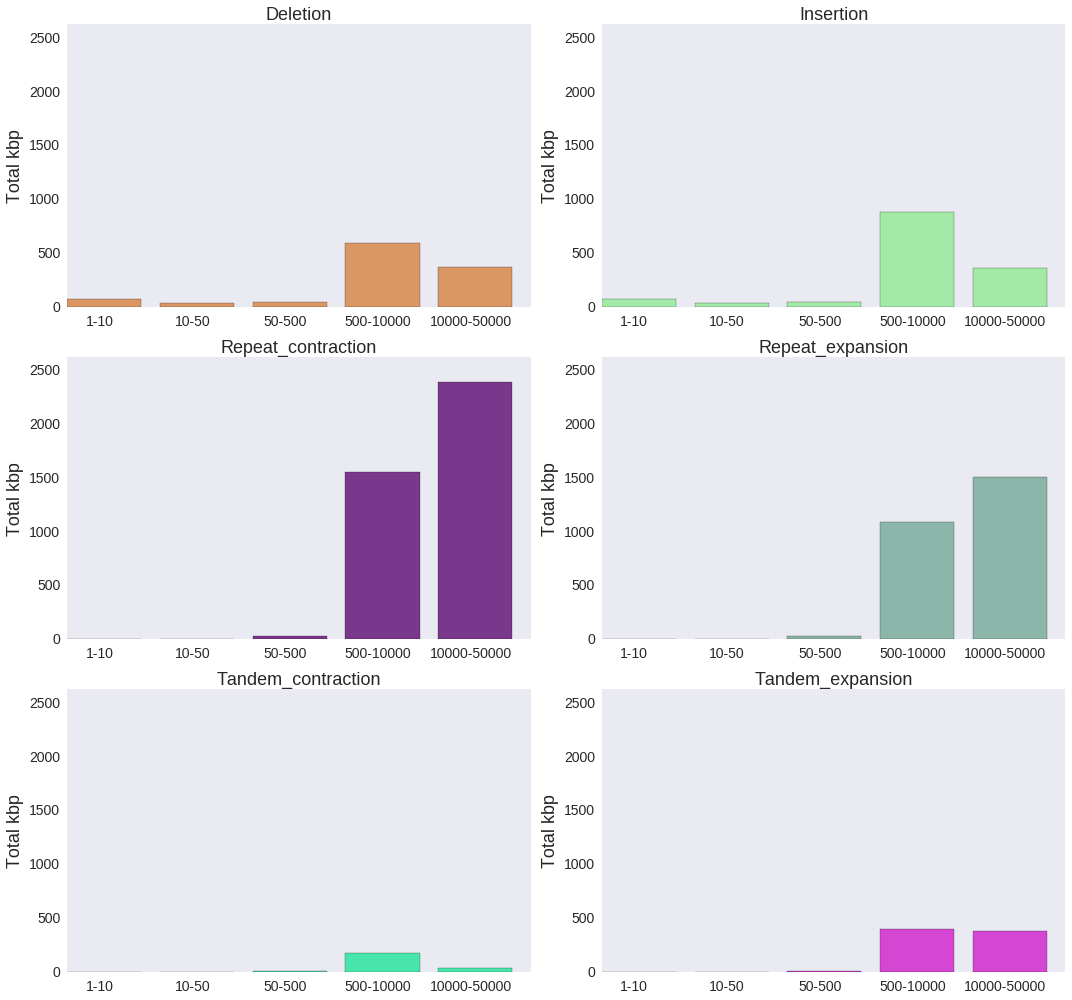

In [363]:
#here generate a faced plot for the size variation types
no_subplots = len(var_types)
no_of_subplots_pair = [int(no_subplots/2), 2]
subplot_coordinates = list(product(range(no_of_subplots_pair[0]), range(no_of_subplots_pair[1])))
subplot_coordinates_list = [list(l) for l in subplot_coordinates]
subplot_coordinates_list_rows = [i[0] for i in subplot_coordinates_list]
subplot_coordinates_list_columns = [i[1] for i in subplot_coordinates_list]
fig, ax = plt.subplots(no_of_subplots_pair[0], no_of_subplots_pair[1], figsize=(15,14))
#up to here generate what is needed to specificy the plots
ymax = Size_summary.max()
ind = np.arange(len(index_a))
fs = 18 #fontsize
#function to generate the subplots
def subplots(ax_ind1, ax_ind2, ind, series, name):
    width = 0.35
    ax[ax_ind1, ax_ind2].bar(ind,series,color=random_color(), alpha=0.8)
    ax[ax_ind1, ax_ind2].set_title(name, fontsize = fs)
    ax[ax_ind1, ax_ind2].set_ylabel('Total kbp', fontsize = fs)
    ax[ax_ind1, ax_ind2].set_xticks(ind + width )
    ax[ax_ind1, ax_ind2].grid(False, which='Major')
    ax[ax_ind1, ax_ind2].set_xticklabels(index_a, fontsize = 14)
    ax[ax_ind1, ax_ind2].set_ylim(0, ymax+ymax/10)
    #for tick in ax[ax_ind1, ax_ind2].yaxis.get_major_ticks():
    #            tick.label.set_fontsize(14) 
    ax[ax_ind1, ax_ind2].tick_params(axis='both', which='major', labelsize=14)
for ax_ind1, ax_ind2, _type in  \
zip(subplot_coordinates_list_rows,subplot_coordinates_list_columns, var_types):
    subplots(ax_ind1, ax_ind2, ind, Size_summary[_type], _type)

plt.tight_layout()
plt.savefig('Assemblytics_summary_df.type_summary.png', bbox_inches='tight')

In [422]:
pwh_size = 79847369
Total_summary_df = Assemblytics_summary_df.unstack().sum(level='numbers', axis=1)
Total_summary_df['variation [1/kbp]'] = Total_summary_df['Total bp']/pwh_size * 1000

In [423]:
Total_summary_df

numbers,Count,Total bp,variation [1/kbp]
Type,,,
Deletion,40918,1116554,13.983604
Insertion,38946,1402497,17.564724
Repeat_contraction,778,3986623,49.928045
Repeat_expansion,602,2636297,33.016705
Tandem_contraction,80,219808,2.752852
Tandem_expansion,163,788157,9.870795


In [390]:
total_relative_var = Total_summary_df['Total bp'].sum()/pwh_size*100

In [392]:
float(total_relative_var)

12.711672440954192

In [418]:
By_size_summary = Assemblytics_summary_df.unstack().sum(level=['Size range', 'numbers'], axis =1).iloc[:,range(1,11,2)].T

In [424]:
By_size_summary['Total bp'] = By_size_summary.sum(axis =1)
By_size_summary['variation [1/kbp]'] = By_size_summary['Total bp']/pwh_size * 1000

In [425]:
By_size_summary

,Type,Deletion,Insertion,Repeat_contraction,Repeat_expansion,Tandem_contraction,Tandem_expansion,Total bp,variation [1/kbp]
Size range,numbers,,,,,,,,
1-10 bp,Total bp,72360,70744,94,92,0,0,286580,3.589098
10-50 bp,Total bp,36161,35834,1656,1287,70,86,150188,1.880939
10000-50000 bp,Total bp,369936,367102,2388987,1506129,37124,382757,10104070,126.542303
50-500 bp,Total bp,42844,47360,34655,32946,6014,10608,348854,4.369011
500-10000 bp,Total bp,595253,881457,1561231,1095843,176600,394706,9410180,117.852099


In [400]:
Assemblytics_summary_df.unstack().sum(level='numbers', axis=1)

numbers,Count,Total bp
Type,,
Deletion,40918,1116554
Insertion,38946,1402497
Repeat_contraction,778,3986623
Repeat_expansion,602,2636297
Tandem_contraction,80,219808
Tandem_expansion,163,788157


In [267]:
Assemblytics_summary_df.sum(level='numbers', axis=1)['Total bp']["Insertion"][0]

70744

In [21]:
summary_file = [x for x in os.listdir(os.path.abspath(_8kbp_folders[0])) if x.endswith('Assemblytics_structural_variants.summary.csv')]

In [27]:
file_name = os.path.join(base_folder, _8kbp_folders[0], summary_file[0])

In [28]:
file_name

'/home/benjamin/genome_assembly/PST79/FALCON/p_assemblies/v9_1/Pst_E104_v1/nucmer_split/assemblytics/Pst_E104_v1_pcontig_037_php_8kbp/Pst_E104_v1_pcontig_037_php_8kbp_50kp.Assemblytics_structural_variants.summary.csv'

In [30]:
variation_types = ['Insertion', 'Deletion', 'Tandem_expansion', 'Tandem_contraction', 'Repeat_expansion', 'Repeat_contraction']

In [73]:
with open(file_name) as s_handle:
    out_handle = open(file_name+'df', 'w')
    variation_type = ''
    for line in s_handle:
        if line.strip() == '':
            continue
        if 'Total' in line:
            continue
        line = line.strip('\n')
        if line in variation_types:
            variation_type = line
            next
        else:
            line = variation_type + ','+line
            print(line, file=out_handle)
    out_handle.close()                

In [107]:
var_df = pd.read_csv(file_name+'df', header=None, names=['Type', 'Size range', 'Count', 'Total bp'])

In [109]:
var_df.head()

,Type,Size range,Count,Total bp
0,Insertion,1-10 bp,312,642
1,Insertion,10-50 bp,31,552
2,Insertion,50-500 bp,2,204
3,Insertion,500-10000 bp,2,12370
4,Insertion,10000-50000 bp,1,11712


In [110]:
index = pd.MultiIndex.from_tuples(list(zip(var_df['Type'],var_df['Size range'])), names=['Type', 'Size range'])

In [119]:
var_df = var_df.set_index(index)
var_df.columns
test = var_df.iloc[:,2:]
test_columns = list(test.columns)

In [132]:
col_index = pd.MultiIndex.from_tuples(list(zip(['contig', 'contig'], test_columns)),names = ['contig','numbers'])

In [133]:
test.columns = col_index

In [134]:
test.head()

contig                   contig         
numbers                   Count Total bp
Type      Size range                    
Insertion 1-10 bp           312      642
          10-50 bp           31      552
          50-500 bp           2      204
          500-10000 bp        2    12370
          10000-50000 bp      1    11712

In [170]:
return_contig_id('Pst_E104_v1_pcontig_037_php_8kbp')

'pcontig_037'

In [166]:
m.groups()[0]

'pcontig_037'

In [100]:
pd.concat([var_df.iloc[:,2:],var_df.iloc[:,2:]], axis=1)

Count  Total bp  Count  Total bp
Type               Size range                                      
Insertion          1-10 bp           312       642    312       642
                   10-50 bp           31       552     31       552
                   50-500 bp           2       204      2       204
                   500-10000 bp        2     12370      2     12370
                   10000-50000 bp      1     11712      1     11712
Deletion           1-10 bp           474       869    474       869
                   10-50 bp           20       387     20       387
                   50-500 bp           2       263      2       263
                   500-10000 bp        1      9449      1      9449
                   10000-50000 bp      1     16393      1     16393
Tandem_expansion   1-10 bp             0         0      0         0
                   10-50 bp            0         0      0         0
                   50-500 bp           3       346      3       346
                   500-10000 bp        2     13867      2     13867
                   10000-50000 bp      0         0      0         0
Tandem_contraction 1-10 bp             0         0      0         0
                   10-50 bp            0         0      0         0
                   50-500 bp           1        58      1        58
                   500-10000 bp        0         0      0         0
                   10000-50000 bp      0         0      0         0
Repeat_expansion   1-10 bp             0         0      0         0
                   10-50 bp            1        26      1        26
                   50-500 bp           1       301      1       301
                   500-10000 bp        3      5852      3      5852
                   10000-50000 bp      0         0      0         0
Repeat_contraction 1-10 bp             0         0      0         0
                   10-50 bp            1        27      1        27
                   50-500 bp           3       227      3       227
                   500-10000 bp        5     33182      5     33182
                   10000-50000 bp      0         0      0         0

In [99]:
var_df.iloc[:,2:].merge(var_df.iloc[:,2:], right_on=True)

TypeError: object of type 'NoneType' has no len()

In [71]:
var_df.head()

,0,1,2,3
0,Insertion,Size range,Count,Total bp
1,Insertion,1-10 bp,312,642
2,Insertion,10-50 bp,31,552
3,Insertion,50-500 bp,2,204
4,Insertion,500-10000 bp,2,12370


In [ ]:
def blast_outfmt6_to_bed(x):
    blast_fo = open(x, 'r')
    blast_lines = blast_fo.readlines()
    bed_file_name = x + '.bed'
    bed_fo = open(bed_file_name, 'w+')
    for l in blast_lines:
        content = l.split('\t')
        if int(content[8]) - int(content[9]) < 1:
            print(content[1], int(content[8]) -1, content[9], content[0], content[10], "+", sep="\t", file=bed_fo) 
        else:
            print(content[1], int(content[9]) -1, content[8],  content[0], content[10], "-", sep = "\t", file=bed_fo)
    blast_fo.close()
    bed_fo.close()